In [10]:
import numpy as np
np.random.seed(7)
from keras.models import load_model
from tools import *
from localizer import *
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cm as cm

In [11]:
#model = load_model('../models/lab_profile-WifiStandard.hdf5')
folder_path = '../models'
models = []
file_count = 0
for file_name in os.listdir(folder_path):
    if os.path.isfile(folder_path + '/' + file_name):
        temp_model = load_model(folder_path + '/' + file_name)
        models.append((temp_model, file_name))
        print('{} loaded'.format(file_name))
        file_count += 1
print('Loaded {} files from {}'.format(file_count, folder_path))

4thHall_profile-Normal.hdf5 loaded
4thHall_profile-Minimal.hdf5 loaded
4thHall_profile-Regularized.hdf5 loaded
Loaded 3 files from ../models


In [7]:
lab_loc = localizer()
lab_loc.load_profile('4thHall_profile')
X_train, y_train, X_test, y_test = load_data_from_folder('../datasets', lab_loc.profile, 
                                                         train_test_split=0.8, item='rssi')
y_train_scaled = []
for i, element in enumerate(y_train):
    x_temp, y_temp = scale_xy(y_train[i,0], y_train[i,1], imin=0., imax=2023., omin=0.0, omax=1.0)
    y_train_scaled.append([x_temp, y_temp])
y_train = np.array(y_train_scaled)

y_test_scaled = []
for i, element in enumerate(y_test):
    x_temp, y_temp = scale_xy(y_test[i,0], y_test[i,1], imin=0., imax=2023., omin=0.0, omax=1.0)
    y_test_scaled.append([x_temp, y_temp])
y_test = np.array(y_test_scaled)


shape_str = '{:10s} | {:15s} | {:15s}'
print(shape_str.format('', 'X shape', 'y shape'))
print(shape_str.format('TRAIN', str(X_train.shape), str(y_train.shape)))
print(shape_str.format('TEST', str(X_test.shape), str(y_test.shape)))

Loaded profile: 4thHall_profile
4th_HALL_2017-07-07_10:21 loaded
Loaded 1 files from ../datasets
           | X shape         | y shape        
TRAIN      | (480, 64)       | (480, 2)       
TEST       | (120, 64)       | (120, 2)       


In [12]:
points = []
for point in y_train:
    if str(point) in points:
        pass
    else:
        points.append(str(point))
num_points = len(points)
print(num_points)
color_map_iter = iter(cm.rainbow(np.linspace(0, 1, num_points)))
colors = {}
for point in y_train:
    try: 
        colors[str(point)]
    except:
        colors[str(point)] = next(color_map_iter)

6


*Training Data*

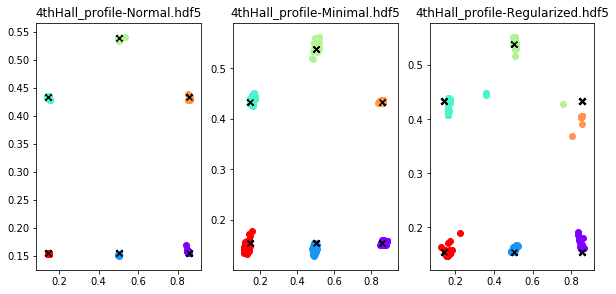

In [13]:
import matplotlib.pyplot as plt
'''
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
'''
n = len(models)
plt.figure(figsize=(10,10))
for j in range(n):
    pred_train = models[j][0].predict(X_train, verbose=0)
    title = models[j][1]
    ax = plt.subplot(2, n, j + 1)
    for i, point in enumerate(pred_train):
        color = colors[str(y_train[i])]
        plt.scatter(point[0], point[1], color=color)
        plt.scatter(y_train[i, 0], y_train[i, 1], color='black', marker='x')
        plt.title(title)
plt.show()

*Test Data*

4thHall_profile-Normal.hdf5 Correct Predictions: 120/120 100.00%
4thHall_profile-Minimal.hdf5 Correct Predictions: 119/120 99.17%
4thHall_profile-Regularized.hdf5 Correct Predictions: 117/120 97.50%


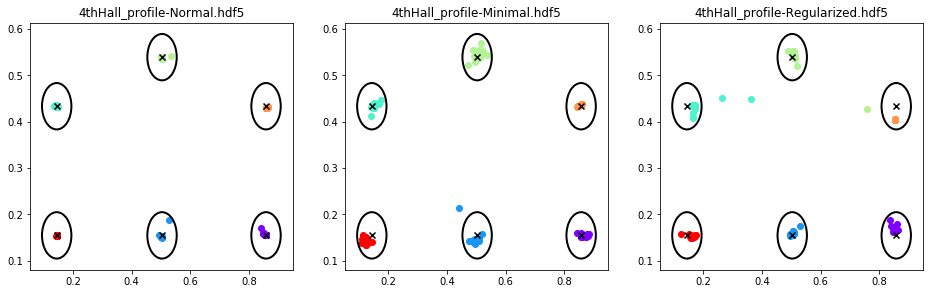

In [14]:
n = len(models)
plt.figure(figsize=(16,10))
eval_range = 0.05

for j in range(n):
    correct_points = 0
    pred_test = models[j][0].predict(X_test, verbose=0)
    title = models[j][1]
    ax = plt.subplot(2, n, j + 1)
    for i, point in enumerate(pred_test):
        color = colors[str(y_test[i])]
        plt.scatter(point[0], point[1], color=color)
        # compute the distance to the target
        x_diff = point[0] - y_test[i,0]
        y_diff = point[1] - y_test[i,1]
        dist = np.sqrt(np.square(x_diff) + np.square(y_diff))
        if dist < eval_range:
            correct_points += 1
    # plot acceptable range circles
    for item in colors:
        points = item.strip('[]').split()
        plt.scatter(float(points[0]), float(points[1]), color='black', marker='x')
        rect = patches.Circle((float(points[0]), float(points[1])),
                              radius=eval_range,linewidth=2,edgecolor='k',facecolor='none')
        ax.add_patch(rect)
    plt.title(title)
    print('{} Correct Predictions: {}/{} {:.2f}%'.format(title, correct_points, len(pred_test), 
                                                  100*float(correct_points)/float(len(pred_test))))
plt.show()